In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from itertools import chain
import copy
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import tree
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate,cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#prepreocessing the data as in Data exploration
myDF=pd.read_table("Seismic bumps/seismic-bumps.txt",sep=",")
myDF["class"]=myDF["class"].astype('category')
myDF_names_num=myDF.select_dtypes(include=np.number).columns
myDF_names_cat=myDF.select_dtypes(exclude=np.number).columns
myDF[myDF_names_cat]=myDF[myDF_names_cat].astype('category')
myDF=myDF.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'],errors='ignore')
N=myDF.shape[0]
L=myDF.shape[1]
myDF_names_num=myDF.select_dtypes(include=np.number).columns
def myscale(X):
    return(X*1.0/(X.max()- X.min()))
myDF_norm=sk.preprocessing.scale(myDF[myDF_names_num])
pca = sk.decomposition.PCA()
scores=pca.fit_transform(myDF_norm)

In [3]:
#create dummy variables for the categorical ones
myDFdummies=pd.get_dummies(data= myDF.loc[:, myDF.columns != 'class'],columns=myDF_names_cat[myDF_names_cat!= 'class'],drop_first=True)
myDFdummies


,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,seismic_b,seismoacoustic_b,seismoacoustic_c,shift_W,ghazard_b,ghazard_c
0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,2000,0,0,0,0,0,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,3000,0,0,0,0,0,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,81410,785,432,151,0,0,0,0,0,0,0,1,0,0,1,1,0
2580,42110,555,213,118,0,0,0,0,0,0,0,1,0,0,1,0,0
2581,26960,540,101,112,0,0,0,0,0,0,0,1,0,0,1,0,0
2582,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0


Decision Tree
[[2155  259]
 [ 146   24]]
{'accuracy': 84.53, 'precision_macro': 51.34, 'recall_macro': 53.45, 'sensitivity': 0.14, 'specificity': 0.89}
Naive Bayes
[[2264  150]
 [ 136   34]]
{'accuracy': 88.94, 'precision_macro': 52.8, 'recall_macro': 56.9, 'sensitivity': 0.2, 'specificity': 0.94}
Random Forest
[[2359   55]
 [ 163    7]]
{'accuracy': 91.8, 'precision_macro': 48.14, 'recall_macro': 50.77, 'sensitivity': 0.04, 'specificity': 0.98}
MLP
[[2253  161]
 [ 157   13]]
{'accuracy': 91.76, 'precision_macro': 48.45, 'recall_macro': 51.3, 'sensitivity': 0.08, 'specificity': 0.93}


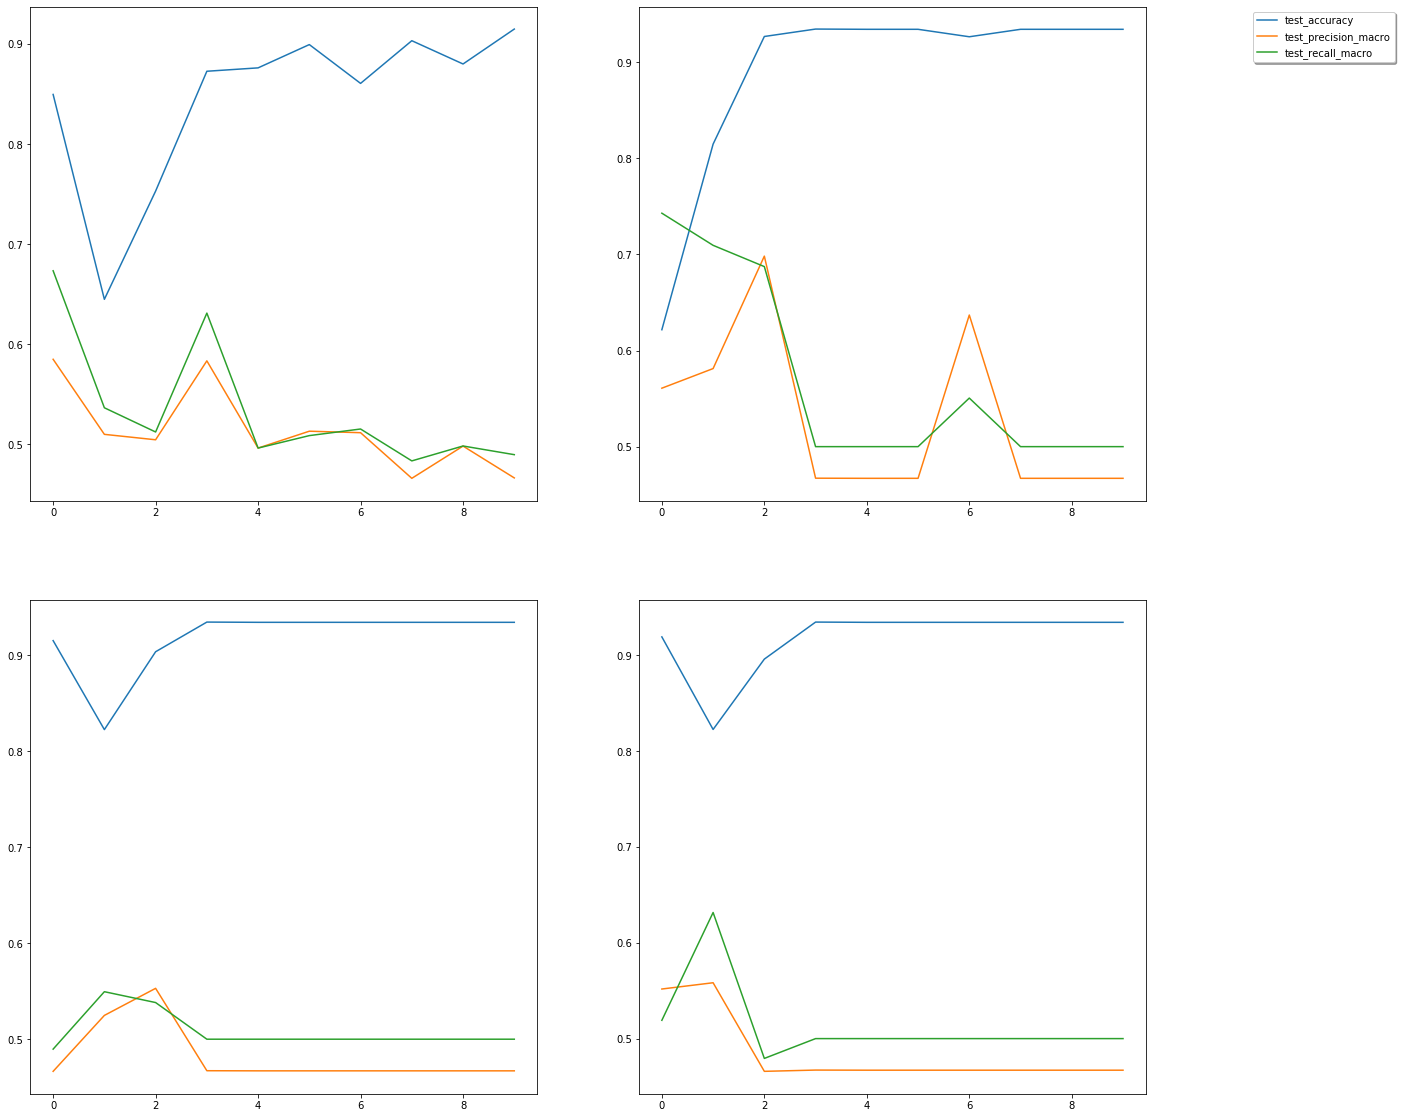

In [4]:
#Decision tree, Naive Bayes, Random Forest, and MultiLayper Perceptron without further data pre-processing
DT=tree.DecisionTreeClassifier()
NB=GaussianNB()
RF=RandomForestClassifier()
MLP=MLPClassifier()
DTcv=cross_validate(DT, myDFdummies,myDF['class'], cv=10, scoring=['accuracy','precision_macro', 'recall_macro'])
NBcv=cross_validate(NB, myDFdummies,myDF['class'], cv=10, scoring=['accuracy','precision_macro', 'recall_macro'])
RFcv=cross_validate(RF, myDFdummies,myDF['class'], cv=10, scoring=['accuracy','precision_macro', 'recall_macro'])
MLPcv=cross_validate(RF, myDFdummies,myDF['class'], cv=10, scoring=['accuracy','precision_macro', 'recall_macro'])
f, ax = plt.subplots(2,2,figsize=(20, 20))
ax[0,0].plot(np.arange(10),DTcv['test_accuracy'],label='test_accuracy')
ax[0,0].plot(np.arange(10),DTcv['test_precision_macro'],label='test_precision_macro')
ax[0,0].plot(np.arange(10),DTcv['test_recall_macro'],label='test_recall_macro')
ax[0,1].plot(np.arange(10),NBcv['test_accuracy'],label='test_accuracy')
ax[0,1].plot(np.arange(10),NBcv['test_precision_macro'],label='test_precision_macro')
ax[0,1].plot(np.arange(10),NBcv['test_recall_macro'],label='test_recall_macro')
ax[1,0].plot(np.arange(10),RFcv['test_accuracy'],label='test_accuracy')
ax[1,0].plot(np.arange(10),RFcv['test_precision_macro'],label='test_precision_macro')
ax[1,0].plot(np.arange(10),RFcv['test_recall_macro'],label='test_recall_macro')
ax[1,1].plot(np.arange(10),MLPcv['test_accuracy'],label='test_accuracy')
ax[1,1].plot(np.arange(10),MLPcv['test_precision_macro'],label='test_precision_macro')
ax[1,1].plot(np.arange(10),MLPcv['test_recall_macro'],label='test_recall_macro')
ax[0,1].legend(loc="upper right", bbox_to_anchor=(1.5, 1), ncol=1,  fancybox=True, shadow=True)
DTcm=confusion_matrix(myDF['class'], cross_val_predict(DT, myDFdummies,myDF['class'], cv=10))
NBcm=confusion_matrix(myDF['class'], cross_val_predict(NB, myDFdummies,myDF['class'], cv=10))
RFcm=confusion_matrix(myDF['class'], cross_val_predict(RF, myDFdummies,myDF['class'], cv=10))
MLPcm=confusion_matrix(myDF['class'], cross_val_predict(MLP, myDFdummies,myDF['class'], cv=10))
print('Decision Tree')
print(DTcm)
DTs={'accuracy': round(DTcv['test_accuracy'].mean()*100,2),
    'precision_macro': round(DTcv['test_precision_macro'].mean()*100,2),
    'recall_macro': round(DTcv['test_recall_macro'].mean()*100,2),
    'sensitivity': round(DTcm[1,1]/(DTcm[1,1]+DTcm[1,0]),2),
     'specificity': round(DTcm[0,0]/(DTcm[0,1]+DTcm[0,0]),2)}
print(DTs)
print('Naive Bayes')
print(NBcm)
NBs={'accuracy': round(NBcv['test_accuracy'].mean()*100,2),
    'precision_macro': round(NBcv['test_precision_macro'].mean()*100,2),
    'recall_macro': round(NBcv['test_recall_macro'].mean()*100,2),
    'sensitivity': round(NBcm[1,1]/(NBcm[1,1]+NBcm[1,0]),2),
     'specificity': round(NBcm[0,0]/(NBcm[0,1]+NBcm[0,0]),2)}
print(NBs)
print('Random Forest')
print(RFcm)
RFs={'accuracy': round(RFcv['test_accuracy'].mean()*100,2),
    'precision_macro': round(RFcv['test_precision_macro'].mean()*100,2),
    'recall_macro': round(RFcv['test_recall_macro'].mean()*100,2),
    'sensitivity': round(RFcm[1,1]/(RFcm[1,1]+RFcm[1,0]),2),
     'specificity': round(RFcm[0,0]/(RFcm[0,1]+RFcm[0,0]),2)}
print(RFs)
print('MLP')
print(MLPcm)
MLPs={'accuracy': round(MLPcv['test_accuracy'].mean()*100,2),
    'precision_macro': round(MLPcv['test_precision_macro'].mean()*100,2),
    'recall_macro': round(MLPcv['test_recall_macro'].mean()*100,2),
    'sensitivity': round(MLPcm[1,1]/(MLPcm[1,1]+MLPcm[1,0]),2),
     'specificity': round(MLPcm[0,0]/(MLPcm[0,1]+MLPcm[0,0]),2)}
print(MLPs)

In [5]:
#metacost from https://github.com/Treers/MetaCost
from sklearn.base import clone


class MetaCost(object):

    """A procedure for making error-based classifiers cost-sensitive
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.linear_model import LogisticRegression
    >>> import pandas as pd
    >>> import numpy as np
    >>> S = pd.DataFrame(load_iris().data)
    >>> S['target'] = load_iris().target
    >>> LR = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    >>> C = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
    >>> model = MetaCost(S, LR, C).fit('target', 3)
    >>> model.predict_proba(load_iris().data[[2]])
    >>> model.score(S[[0, 1, 2, 3]].values, S['target'])
    .. note:: The form of the cost matrix C must be as follows:
    +---------------+----------+----------+----------+
    |  actual class |          |          |          |
    +               |          |          |          |
    |   +           | y(x)=j_1 | y(x)=j_2 | y(x)=j_3 |
    |       +       |          |          |          |
    |           +   |          |          |          |
    |predicted class|          |          |          |
    +---------------+----------+----------+----------+
    |   h(x)=j_1    |    0     |    a     |     b    |
    |   h(x)=j_2    |    c     |    0     |     d    |
    |   h(x)=j_3    |    e     |    f     |     0    |
    +---------------+----------+----------+----------+
    | C = np.array([[0, a, b],[c, 0 , d],[e, f, 0]]) |
    +------------------------------------------------+
    """
    def __init__(self, S, L, C, m=50, n=1, p=True, q=True):
        """
        :param S: The training set
        :param L: A classification learning algorithm
        :param C: A cost matrix
        :param q: Is True iff all resamples are to be used  for each examples
        :param m: The number of resamples to generate
        :param n: The number of examples in each resample
        :param p: Is True iff L produces class probabilities
        """
        if not isinstance(S, pd.DataFrame):
            raise ValueError('S must be a DataFrame object')
        new_index = list(range(len(S)))
        S.index = new_index
        self.S = S
        self.L = L
        self.C = C
        self.m = m
        self.n = len(S) * n
        self.p = p
        self.q = q

    def fit(self, flag, num_class):
        """
        :param flag: The name of classification labels
        :param num_class: The number of classes
        :return: Classifier
        """
        col = [col for col in self.S.columns if col != flag]
        S_ = {}
        M = []

        for i in range(self.m):
            # Let S_[i] be a resample of S with self.n examples
            S_[i] = self.S.sample(n=self.n, replace=True)

            X = S_[i][col].values
            y = S_[i][flag].values

            # Let M[i] = model produced by applying L to S_[i]
            model = clone(self.L)
            M.append(model.fit(X, y))

        label = []
        S_array = self.S[col].values
        for i in range(len(self.S)):
            if not self.q:
                k_th = [k for k, v in S_.items() if i not in v.index]
                M_ = list(np.array(M)[k_th])
            else:
                M_ = M

            if self.p:
                P_j = [model.predict_proba(S_array[[i]]) for model in M_]
            else:
                P_j = []
                vector = [0] * num_class
                for model in M_:
                    vector[model.predict(S_array[[i]])] = 1
                    P_j.append(vector)

            # Calculate P(j|x)
            P = np.array(np.mean(P_j, 0)).T

            # Relabel
            label.append(np.argmin(self.C.dot(P)))

        # Model produced by applying L to S with relabeled y
        X_train = self.S[col].values
        y_train = np.array(label)
        model_new = clone(self.L)
        model_new.fit(X_train, y_train)

        return model_new

    

In [6]:
#functions:
######## create lagged variables
######## confusion matrix with cross validation from sklearn
######## personalized cross validation
######## personalized cross validation with metacost
######## personalized forward selection
######## personalized forward selection with metacost
def lagg(X,n,include):
    Y=copy.copy(X)
    newX=copy.copy(X[include])
    for i in range(1,n+1):
        Y=pd.merge(Y,newX.shift(i),how='inner',suffixes=('', "-" +str(i)),left_index=True, right_index=True)
    return(Y)

def myCV_cm(model,predictors,target,F=10):
    cm=confusion_matrix(target, cross_val_predict(model, predictors,target, cv=F))
    return(cm)

def myCV(model,predictors,target,F=10):
    cv = StratifiedKFold(n_splits=F)
    i=0
    target_test=copy.copy(target)
    m=pd.DataFrame(np.zeros((F,5)),columns=['accuracy','f1_macro','roc_auc','precision_macro', 'recall_macro'])
    for train_idx, test_idx, in cv.split(predictors, target):
        X_train, y_train = predictors.iloc[train_idx,:], target.iloc[train_idx]
        X_test, y_test = predictors.iloc[test_idx,:], target.iloc[test_idx]
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)
        target_test.iloc[test_idx]=y_pred
        m.iloc[i,:]=[model.score(X_test, y_test),
                     f1_score(y_test, y_pred, average='macro'),
                     roc_auc_score(y_test, y_pred, average='macro'),
                     precision_score(y_test, y_pred, average='macro'),
                     recall_score(y_test, y_pred, average='macro')]
        i+=1
    CM=confusion_matrix(target,target_test)
    toreturn={'accuracy': round(m['accuracy'].mean()*100,2),
              'f1_macro': round(m['f1_macro'].mean(),3),
              'roc_auc': round(m['roc_auc'].mean(),3),
             'precision_macro': round(m['precision_macro'].mean()*100,2),
              'recall_macro': round(m['recall_macro'].mean()*100,2),
             'sensitivity':  round(100*CM[1,1]/(CM[1,1]+CM[1,0]),2),
             'specificity': round(100*CM[0,0]/(CM[0,1]+CM[0,0]),2)}
    return(toreturn)

def myMetacostCV(model,predictors,target,C,F=10):
    S=pd.merge(predictors,target,how='inner', left_index=True, right_index=True)
    target_test=copy.copy(target)
    cv = StratifiedKFold(n_splits=F)
    i=0
    m=pd.DataFrame(np.zeros((F,5)),columns=['accuracy','f1_macro','roc_auc','precision_macro', 'recall_macro'])
    for train_idx, test_idx, in cv.split(predictors, target):
        X_train, y_train = predictors.iloc[train_idx,:], target.iloc[train_idx]
        X_test, y_test = predictors.iloc[test_idx,:], target.iloc[test_idx]
        iMetacost=MetaCost(S.iloc[train_idx,:], model, C)
        model2=iMetacost.fit('class',2)  
        y_pred = model2.predict(X_test)
        target_test.iloc[test_idx]=y_pred
        m.iloc[i,:]=[model2.score(X_test, y_test),
                     f1_score(y_test, y_pred, average='macro'),
                     roc_auc_score(y_test, y_pred, average='macro'),
                     precision_score(y_test, y_pred, average='macro'),
                     recall_score(y_test, y_pred, average='macro')]
        i+=1
    CM=confusion_matrix(target,target_test)
    toreturn={'accuracy': round(m['accuracy'].mean()*100,2),
              'f1_macro': round(m['f1_macro'].mean(),3),
              'roc_auc': round(m['roc_auc'].mean(),3),
             'precision_macro': round(m['precision_macro'].mean()*100,2),
              'recall_macro': round(m['recall_macro'].mean()*100,2),
             'sensitivity':  round(100*CM[1,1]/(CM[1,1]+CM[1,0]),2),
             'specificity': round(100*CM[0,0]/(CM[0,1]+CM[0,0]),2)}
    return(toreturn)

def forward_selection(model,predictors, target):
    initial_features = predictors.columns.tolist()
    best_features = []
    auc_best=0
    best_score=[]
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        auc_temp = 0
        temp_score=[]
        for new_column in remaining_features:
            score=myCV(model,pd.DataFrame(predictors[[new_column] + best_features]),target,F=10)
            new_auc=score['recall_macro']
            if(new_auc>auc_temp):
                auc_temp=new_auc
                new_feature=new_column
                temp_score=score
        if(auc_temp>auc_best):
            auc_best=auc_temp
            best_features.append(new_feature)
            best_score=temp_score
            print(best_features)
            print(best_score)
        else:
            break
    return(best_features,best_score)

def forward_selection_metacost(model,predictors, target,C):
    initial_features = predictors.columns.tolist()
    best_features = []
    auc_best=0
    best_score=[]
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        auc_temp = 0
        temp_score=[]
        for new_column in remaining_features:
            print(new_column)
            score=myMetacostCV(model,pd.DataFrame(predictors[[new_column] + best_features]),target,C,F=10)
            new_auc=score['recall_macro']
            if(new_auc>auc_temp):
                auc_temp=new_auc
                new_feature=new_column
                temp_score=score
        if(auc_temp>auc_best):
            auc_best=auc_temp
            best_features.append(new_feature)
            best_score=temp_score
            print(best_features)
            print(best_score)
        else:
            break
    return(best_features,best_score)

In [7]:
#list variables for which lagged variables are not created (categorical and low ACF, from Data Exploration file)
no_lags=[['nbumps5','energy','maxenergy']]
no_lags.append(myDF_names_cat._data.tolist())
no_lags=list(chain(*no_lags))
print(no_lags)
myDF.columns.difference(no_lags)

['nbumps5', 'energy', 'maxenergy', 'seismic', 'seismoacoustic', 'shift', 'ghazard', 'class']


Index(['gdenergy', 'gdpuls', 'genergy', 'gpuls', 'nbumps', 'nbumps2',
       'nbumps3', 'nbumps4'],
      dtype='object')

In [8]:
#create lagged variables
lg=15
newDF=copy.deepcopy(myDFdummies)
newDF.iloc[:,:]=sk.preprocessing.scale(newDF)
newDF=lagg(newDF,lg,myDF.columns.difference(no_lags))
newDF

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,...,nbumps3-14,nbumps4-14,gdenergy-15,gdpuls-15,genergy-15,gpuls-15,nbumps-15,nbumps2-15,nbumps3-15,nbumps4-15
0,-0.327561,-0.872073,-1.050711,-1.211459,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.329568,-0.898738,-1.025805,-1.322299,0.102965,-0.502253,0.789019,-0.242736,-0.068305,-0.145512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.358675,-0.904071,-1.162786,-1.306465,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.268038,-0.653424,-0.440526,0.561974,0.102965,-0.502253,0.789019,-0.242736,-0.068305,-0.096605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.338645,-0.856075,-0.938636,-0.894775,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-0.038544,0.438047,5.225478,2.319573,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,-0.510423,-0.242736,0.431167,0.150284,-0.318746,-0.491658,-0.629984,-0.502253,-0.510423,-0.242736
2580,-0.210042,0.029190,2.498325,1.797044,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,-0.510423,-0.242736,3.133415,2.303739,-0.207730,0.066520,-0.629984,-0.502253,-0.510423,-0.242736
2581,-0.276155,0.002525,1.103616,1.702038,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,0.789019,-0.242736,0.070037,0.736151,-0.327779,-0.296118,-0.629984,-0.502253,-0.510423,-0.242736
2582,-0.323415,-0.385000,-0.129207,-0.039727,-0.629984,-0.502253,-0.510423,-0.242736,-0.068305,-0.243327,...,-0.510423,-0.242736,-0.104301,-0.498919,-0.325117,-0.562764,0.102965,-0.502253,0.789019,-0.242736


In [9]:
#create PCA explaining 80 of the variance
pca2 = sk.decomposition.PCA(n_components=0.8)
PCA_matrix=pca2.fit_transform(newDF.iloc[lg:,:])
newDF_PCA=pd.DataFrame(PCA_matrix,index=range(lg,N),columns=['PC' + str(s+1) for s in range(PCA_matrix.shape[1])])
newDF_class=pd.DataFrame(myDF['class'][lg:])
cumsumPCA=np.cumsum(pca2.explained_variance_ratio_)
len(cumsumPCA)
newDF_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
15,-1.346454,-1.679188,-2.070794,2.159957,-0.679866,1.073479,-0.694928,0.595036,-1.211993,1.078021,...,-0.660574,-0.174283,-0.294938,-1.245784,0.157392,0.594260,-0.259054,-0.379395,0.179598,0.582086
16,-1.437676,-1.605392,-2.110660,1.119209,-1.445417,0.720934,-1.170035,0.371117,-0.425760,0.451856,...,-0.989878,-0.103669,0.575087,0.481754,-1.010815,-0.086388,0.391290,0.443242,0.181778,0.166947
17,-1.612333,-1.374760,-2.104644,0.230385,-1.841834,0.302232,-0.871256,-0.054466,-0.233577,-0.850319,...,-0.427313,1.255552,-0.874539,-0.605679,1.095338,0.158055,0.044047,-0.229414,-0.165511,-0.582992
18,-1.604889,-1.349352,-2.096048,-0.730141,-1.602042,0.335509,-0.029619,0.364035,-0.318902,-2.048893,...,-0.035171,-0.791732,0.142960,-1.134145,-0.614140,-0.015974,0.515408,-0.411546,0.534218,0.102133
19,-1.841956,-1.388664,-2.482230,-1.341129,-1.945692,0.528483,0.064019,0.510833,-0.005286,-2.383870,...,-0.632676,1.110133,0.522696,0.067797,-0.809548,-0.121231,-0.160007,0.797420,0.009983,-0.709290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,-3.561096,2.334183,2.230917,0.963711,1.621704,-0.241377,0.219896,1.270017,0.290909,1.697597,...,1.457520,1.232422,-0.955553,0.695125,0.104935,-0.241862,-0.995021,0.041971,0.751713,0.860137
2580,-3.485220,2.498106,2.369845,1.722439,1.431268,-0.055443,-1.120608,1.022273,0.544814,2.950605,...,2.023755,-1.339503,-0.580700,0.325131,0.311903,0.243265,0.175447,1.120935,-0.631117,0.258275
2581,-3.459537,2.323763,2.198616,2.625275,0.327468,-0.071075,-2.905674,0.252192,1.738781,2.542126,...,0.538035,-1.032600,0.688942,0.667785,-0.266917,-1.222176,0.034121,0.610349,-0.916542,0.011858
2582,-3.520119,2.227412,1.963121,2.200622,-0.506998,-0.377138,-2.424288,0.700156,1.994901,0.105603,...,0.338452,0.203256,-0.374773,0.581422,0.249198,-0.238310,-1.099030,0.184067,-0.491296,0.516510


In [10]:
#compare previous results and new with PCA
{'DT': [myCV(DT,myDFdummies,myDF['class']), myCV(DT,newDF_PCA,newDF_class)],
'RF': [myCV(RF,myDFdummies,myDF['class']), myCV(RF,newDF_PCA,newDF_class)],
'NB': [myCV(NB,myDFdummies,myDF['class']), myCV(NB,newDF_PCA,newDF_class)],
'MLP': [myCV(MLP,myDFdummies,myDF['class']), myCV(MLP,newDF_PCA,newDF_class)],}

{'DT': [{'accuracy': 84.65,
   'f1_macro': 0.51,
   'roc_auc': 0.53,
   'precision_macro': 51.22,
   'recall_macro': 52.96,
   'sensitivity': 16.47,
   'specificity': 89.44},
  {'accuracy': 81.05,
   'f1_macro': 0.496,
   'roc_auc': 0.519,
   'precision_macro': 53.23,
   'recall_macro': 51.87,
   'sensitivity': 18.24,
   'specificity': 85.49}],
 'RF': [{'accuracy': 91.61,
   'f1_macro': 0.496,
   'roc_auc': 0.518,
   'precision_macro': 48.34,
   'recall_macro': 51.76,
   'sensitivity': 5.88,
   'specificity': 97.64},
  {'accuracy': 90.93,
   'f1_macro': 0.479,
   'roc_auc': 0.495,
   'precision_macro': 46.87,
   'recall_macro': 49.51,
   'sensitivity': 1.76,
   'specificity': 97.25}],
 'NB': [{'accuracy': 88.94,
   'f1_macro': 0.524,
   'roc_auc': 0.569,
   'precision_macro': 52.8,
   'recall_macro': 56.9,
   'sensitivity': 20.0,
   'specificity': 93.79},
  {'accuracy': 76.73,
   'f1_macro': 0.559,
   'roc_auc': 0.657,
   'precision_macro': 67.76,
   'recall_macro': 65.68,
   'sensitiv

In [11]:
#cross validation with NB and Metacost for dummy variables
myMetacostCV(NB,myDFdummies,myDF['class'],np.array([[0, 20], [1, 0]]),10)

{'accuracy': 75.68,
 'f1_macro': 0.508,
 'roc_auc': 0.605,
 'precision_macro': 56.01,
 'recall_macro': 60.46,
 'sensitivity': 42.94,
 'specificity': 77.96}

In [12]:
#cross validation with NB and Metacost after PCA
myMetacostCV(NB,newDF_PCA,newDF_class,np.array([[0, 20], [1, 0]]),10)

{'accuracy': 67.43,
 'f1_macro': 0.534,
 'roc_auc': 0.694,
 'precision_macro': 65.62,
 'recall_macro': 69.44,
 'sensitivity': 71.76,
 'specificity': 67.11}

In [13]:
#Forward selection with NB and Metacost after PCA
FS,BestScore=forward_selection(NB,newDF_PCA,newDF_class)
print(FS)
print(BestScore)

['PC1']
{'accuracy': 89.1, 'f1_macro': 0.519, 'roc_auc': 0.554, 'precision_macro': 63.59, 'recall_macro': 55.36, 'sensitivity': 16.47, 'specificity': 94.25}
['PC1', 'PC27']
{'accuracy': 87.51, 'f1_macro': 0.562, 'roc_auc': 0.597, 'precision_macro': 63.33, 'recall_macro': 59.7, 'sensitivity': 27.65, 'specificity': 91.75}
['PC1', 'PC27', 'PC34']
{'accuracy': 87.08, 'f1_macro': 0.574, 'roc_auc': 0.614, 'precision_macro': 63.55, 'recall_macro': 61.38, 'sensitivity': 31.76, 'specificity': 91.0}
['PC1', 'PC27', 'PC34', 'PC24']
{'accuracy': 86.46, 'f1_macro': 0.59, 'roc_auc': 0.635, 'precision_macro': 68.25, 'recall_macro': 63.51, 'sensitivity': 37.06, 'specificity': 89.95}
['PC1', 'PC27', 'PC34', 'PC24', 'PC23']
{'accuracy': 85.87, 'f1_macro': 0.594, 'roc_auc': 0.646, 'precision_macro': 67.73, 'recall_macro': 64.56, 'sensitivity': 40.0, 'specificity': 89.12}
['PC1', 'PC27', 'PC34', 'PC24', 'PC23', 'PC38']
{'accuracy': 85.44, 'f1_macro': 0.595, 'roc_auc': 0.649, 'precision_macro': 67.3, 'reca

In [14]:
#Complement Naive Bayes is better suited for imbalanced datasets
CompNB=ComplementNB()

In [15]:
# forward_selection_metacost is too much time consuming
#FS,BestScore=forward_selection_metacost(NB,newDF_PCA,newDF_class,np.array([[0, 20], [1, 0]]))
#print(FS)
#print(BestScore)

In [16]:
#function to bin variales by entroy, stopping after having 5 breakpoints
from scipy.stats import entropy
def binner(DF,pred,target,l):
    DF=DF.sort_values(by=pred)
    L=len(DF[target])
    S=entropy(DF[target].value_counts()/L,base=2)
    MGain=0
    anything=0
    for i in range(L-1):
        a=DF[pred].iloc[i]
        b=DF[pred].iloc[i+1]
        if(a!=b):
            breakpoint=(a+b)/2
            setA=DF.iloc[:i+1]
            setB=DF.iloc[i+1:]
            sA=entropy(setA[target].value_counts()/L,base=2)
            sB=entropy(setB[target].value_counts()/L,base=2)
            newS=len(setA)*sA/L+len(setB)*sB/L
            Gain=S-newS
            if(Gain>MGain):
                MGain=Gain
                splitA=setA
                splitB=setB
                anything=1
                newbreakpoint=breakpoint
                newA=a
                newB=b
    if(anything==1):
        anything=0
        l.append(newbreakpoint)
        if(len(l)<5):
            if(len(splitA)>1):
                binner(copy.copy(splitA),pred,target,l)
                anything=0
            if(len(splitA)>1):   
                binner(copy.copy(splitB),pred,target,l)
                anything=0
    return(l)

In [17]:
#create bins by entropy and convert with dummy variables
forBinning=pd.merge(newDF_PCA,newDF_class,how='inner', left_index=True, right_index=True)
forBinning=forBinning.astype('object')
for col in newDF_PCA.columns:
    print(col)
    bins=binner(forBinning,col,'class',l=[])
    bins.sort()
    print(bins)
    B=len(bins)
    cond=newDF_PCA[col]<bins[0]
    forBinning[col][cond]='<' + str(round(bins[0],2))
    cond=newDF_PCA[col]>=bins[B-1]
    forBinning[col][cond]='>' + str(round(bins[B-1],2))
    for j in range(1,B):
        cond=np.logical_and(newDF_PCA[col]>bins[j-1], newDF_PCA[col]<bins[j])
        forBinning[col][cond]='<' + str(round(bins[j],2))
forBinning=forBinning[forBinning.columns[forBinning.columns!='class']]
myDFdummies_binned=pd.get_dummies(data=forBinning[forBinning.columns[forBinning.columns!='class']])

PC1
[-4.756661029790842, -4.75169043795772, -3.9399652499043656, -3.935266358616018, -0.19167301618000648, -0.18279130003276928, 5.5704809610947805, 5.587893418665303]
PC2
[-13.335867185945299, -12.966754181992705, -12.03282807251382, -11.181708975626456, -3.5387214032605634, -3.5145993577164747, 0.39417235440637405]
PC3
[-8.835121075329445, -8.584100630611905, -7.079451571616313, -6.819739501609428, -4.2178970072978945, -2.582299026688712, 0.655443104780775, 0.7808261329066117]
PC4
[-3.7873110530500105, -3.7082606530615316, -3.270371663055747, -2.2487363787190917, -2.245629758570263, 0.12471195312425408, 0.9676329262721064, 4.405205455135177]
PC5
[-5.633732900987436, -5.516189237154286, -4.4645418171420985, -2.1912977308010557, -2.1865539332981454, -0.8794116488786814, 0.6340813898254063, 3.6023189065421715]
PC6
[-6.295536358584104, -5.069952750621939, -3.812382330738279, -1.7239322350274513, -1.721750825102425, -1.707397467754913, -0.687219285803759, -0.6808736902291992, 1.9695066898

In [18]:
myCV(CompNB,myDFdummies_binned,newDF_class)

{'accuracy': 76.65,
 'f1_macro': 0.625,
 'roc_auc': 0.749,
 'precision_macro': 71.2,
 'recall_macro': 74.93,
 'sensitivity': 72.94,
 'specificity': 76.91}

In [19]:
FS,BestScore=forward_selection(CompNB,myDFdummies_binned,newDF_class)
print(FS)
print(BestScore)

['PC12_<-3.14']
{'accuracy': 93.38, 'f1_macro': 0.483, 'roc_auc': 0.5, 'precision_macro': 46.69, 'recall_macro': 50.0, 'sensitivity': 0.0, 'specificity': 100.0}
['PC12_<-3.14', 'PC1_>5.59']
{'accuracy': 86.38, 'f1_macro': 0.621, 'roc_auc': 0.684, 'precision_macro': 65.71, 'recall_macro': 68.39, 'sensitivity': 47.65, 'specificity': 89.12}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69']
{'accuracy': 86.92, 'f1_macro': 0.625, 'roc_auc': 0.687, 'precision_macro': 65.85, 'recall_macro': 68.68, 'sensitivity': 47.65, 'specificity': 89.7}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07']
{'accuracy': 85.91, 'f1_macro': 0.634, 'roc_auc': 0.703, 'precision_macro': 67.86, 'recall_macro': 70.32, 'sensitivity': 52.35, 'specificity': 88.29}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07', 'PC39_<1.21']
{'accuracy': 84.43, 'f1_macro': 0.631, 'roc_auc': 0.717, 'precision_macro': 65.9, 'recall_macro': 71.72, 'sensitivity': 57.06, 'specificity': 86.37}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1

['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07', 'PC39_<1.21', 'PC7_<1.94', 'PC27_<-0.43', 'PC7_>4.43', 'PC28_<-2.28', 'PC4_>4.41', 'PC26_<-0.94', 'PC10_<-3.2', 'PC21_<-2.35', 'PC39_<-2.24', 'PC38_>2.35', 'PC12_<-3.11', 'PC28_<-3.45', 'PC35_<-3.86', 'PC18_<-1.22', 'PC25_<-0.65', 'PC40_<-0.74', 'PC1_<-4.75', 'PC26_<-3.19', 'PC40_<-1.23', 'PC30_<-2.56', 'PC38_<-1.52']
{'accuracy': 86.34, 'f1_macro': 0.694, 'roc_auc': 0.809, 'precision_macro': 68.51, 'recall_macro': 80.94, 'sensitivity': 74.71, 'specificity': 87.16}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07', 'PC39_<1.21', 'PC7_<1.94', 'PC27_<-0.43', 'PC7_>4.43', 'PC28_<-2.28', 'PC4_>4.41', 'PC26_<-0.94', 'PC10_<-3.2', 'PC21_<-2.35', 'PC39_<-2.24', 'PC38_>2.35', 'PC12_<-3.11', 'PC28_<-3.45', 'PC35_<-3.86', 'PC18_<-1.22', 'PC25_<-0.65', 'PC40_<-0.74', 'PC1_<-4.75', 'PC26_<-3.19', 'PC40_<-1.23', 'PC30_<-2.56', 'PC38_<-1.52', 'PC21_<-2.48']
{'accuracy': 86.53, 'f1_macro': 0.696, 'roc_auc': 0.81, 'precision_macro': 68.5

['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07', 'PC39_<1.21', 'PC7_<1.94', 'PC27_<-0.43', 'PC7_>4.43', 'PC28_<-2.28', 'PC4_>4.41', 'PC26_<-0.94', 'PC10_<-3.2', 'PC21_<-2.35', 'PC39_<-2.24', 'PC38_>2.35', 'PC12_<-3.11', 'PC28_<-3.45', 'PC35_<-3.86', 'PC18_<-1.22', 'PC25_<-0.65', 'PC40_<-0.74', 'PC1_<-4.75', 'PC26_<-3.19', 'PC40_<-1.23', 'PC30_<-2.56', 'PC38_<-1.52', 'PC21_<-2.48', 'PC36_<-2.71', 'PC2_<-3.51', 'PC8_<-1.99', 'PC39_<-1.87', 'PC36_<-3.92', 'PC5_<-5.52', 'PC28_<-2.33', 'PC20_<-2.05', 'PC38_<-2.51', 'PC6_<-1.71', 'PC45_>1.7', 'PC22_<-2.22', 'PC7_<-3.97']
{'accuracy': 87.43, 'f1_macro': 0.715, 'roc_auc': 0.843, 'precision_macro': 69.31, 'recall_macro': 84.25, 'sensitivity': 80.59, 'specificity': 87.91}
['PC12_<-3.14', 'PC1_>5.59', 'PC13_<-1.69', 'PC42_<3.07', 'PC39_<1.21', 'PC7_<1.94', 'PC27_<-0.43', 'PC7_>4.43', 'PC28_<-2.28', 'PC4_>4.41', 'PC26_<-0.94', 'PC10_<-3.2', 'PC21_<-2.35', 'PC39_<-2.24', 'PC38_>2.35', 'PC12_<-3.11', 'PC28_<-3.45', 'PC35_<-3.86', 'PC18_<-1.

In [20]:
myCV_cm(CompNB,myDFdummies_binned[FS],newDF_class)

array([[2089,  310],
       [  30,  140]], dtype=int64)

In [21]:
myCV(CompNB,myDFdummies_binned[FS],newDF_class)

{'accuracy': 86.77,
 'f1_macro': 0.704,
 'roc_auc': 0.847,
 'precision_macro': 67.67,
 'recall_macro': 84.72,
 'sensitivity': 82.35,
 'specificity': 87.08}

In [22]:
#FS,BestScore=forward_selection_metacost(CompNB,myDFdummies_binned,newDF_class,np.array([[0, 20], [1, 0]]))
#print(FS)
#print(BestScore)

In [23]:
#myMetacostCV(CompNB,myDFdummies_binned,newDF_class,np.array([[0, 20], [1, 0]]))